### 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

### 2. Import the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kindersham/100DaysDS/master/Housing%20Prices%20-%20Linear%20Regression/HousingPrices.csv')

### 3. Understand the data

In [ ]:
df.shape

(1460, 2)

The dataset contain 1,460 rows and 2 columns. Let’s take a look at what our dataset actually looks like. enter the df.head()which will retrieves the first 5 records from our dataset.

In [ ]:
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [ ]:
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


draw data points on the two-dimensional graph to focus on the dataset and see if we can manually find any relationship between the data.

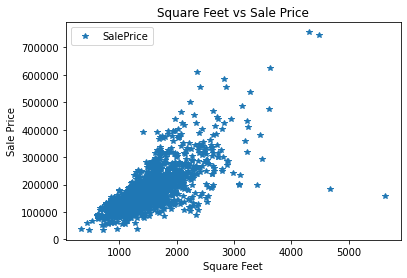

In [ ]:
df.plot(x='SquareFeet', y='SalePrice', style='*')
plt.title('Square Feet vs Sale Price')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the house square feet and the house sales price.

### 4. Preparing the Data

Divide the data into “attributes” and “target labels”. Attributes are independent variables, and target labels are dependent variables whose values ​​are to be predicted. In our dataset we only have two columns. We want to predict the Sales Price based upon the Square Feet of the house. Therefore our attribute set will consist of the “SquareFeet” column, and the label will be the “SalesPrice” column.

In [ ]:
X = df.iloc[:, :-1].values # Square feet
y = df.iloc[:, 1].values   # Sale Price

The attributes are stored in the X variable. We specified “-1” as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is “SalesPrice”. Similarly the y variable contains the labels. We specified 1 for the label column since the index for “SalesPrice” column is 1.




Now that we have our attributes and labels, the next step is to split this data into training and test sets. We’ll do this by using Scikit-Learn built-in train_test_split() method:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

### 5. Modelling



In [ ]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')

    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
import sklearn
from sklearn import linear_model
lr = LinearRegression().fit(X_train, y_train)
get_cv_scores(lr)

CV Mean:  0.5147052949885541
STD:  0.06563558755274343




In [ ]:
accuracy = lr.score(X_test, y_test)
print("Accuracy:",(int(round(accuracy*100))))

Accuracy: 43


With Scikit-Learn it is extremely straight forward to implement linear regression models, as all you really need to do is import the LinearRegression class, instantiate it, and call the fit() method along with our training data. This is about as simple as it gets when using a machine learning library to train on your data.

In [ ]:
print(lr.intercept_)
print(lr.coef_)

13330.293444921146
[110.26434426]


This means that for every one unit of change in Square Feet, the change in the SalesPrice is about 110.26.

### 6. Predictions

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

In [ ]:
y_pred = lr.predict(X_test)

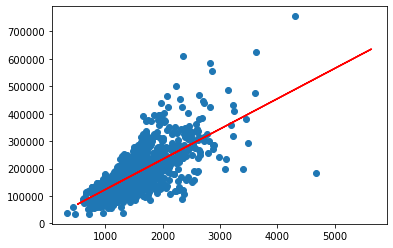

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.
To compare the actual output values for X_test with the predicted values

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,200624,290645.119259
1,133000,187327.428687
2,110000,145978.299590
3,192000,236284.797539
4,88000,133738.957377


Although our model is not very accurate, the predicted value is close to the actual value.

### 7. Evaluation

The final step is to evaluate the performance of the algorithm. This step is particularly important for comparing the performance of different algorithms on specific data sets. For regression algorithms, three evaluation indicators are usually used:
Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
Mean Squared Error (MSE) is the mean of the squared errors.
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

Mean Squared Error (MSE) The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize.

Mean Absolute Error (MAE) This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent.

R-squared or Coefficient of Determination This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.

The Scikit-Learn library comes with pre-built functions that can be used to find out these values.

In [ ]:
import statistics
SSE = sum((y_pred -  y_test)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

0.4337555468432769

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 39364.76724953735
Mean Squared Error: 3913788296.4027987
Root Mean Squared Error: 62560.277304394986


You can see that the value of root mean squared error is 62560.28, which is large than 10% of the mean value of the Sales Price i.e. 180921.2. This means that our algorithm is just average.
There are many factors that contribute to this inaccuracy, some of which are listed here:
The features we used may not have had a high enough correlation to the values we were trying to predict.
We assume that this data has a linear relationship, but this is not the case. visual data can help you determine.

https://medium.com/analytics-vidhya/linear-regression-in-python-with-scikit-learn-e1bb8a059cd2